# Machine Learning - HW2
## Amirhossein Imani - ai2335

##  Problem 1 - a 

To derive $\hat{\pi}$ from the objection function, we need to take the derivative of objective function based on  ${\pi}$.
<br />
It will be equal to:
$$ \frac{\sigma}{\sigma\pi}\sum_{i=0}^n lnp(y_i|\pi) + \frac{\sigma}{\sigma\pi}\sum_{i=0}^n lnp(x_i1|\theta_{y_i}^{(1)}) + \frac{\sigma}{\sigma\pi}\sum_{i=0}^n lnp(x_i2|\theta_{y_i}^{(2)}) $$
$$ = \frac{\sigma}{\sigma\pi}\sum_{i=0}^n lnp(y_i|\pi) + 0 + 0 = \frac{\sigma}{\sigma\pi}\sum_{i=0}^n ln[\pi^x_i(1-\pi)^{1-x_i}] $$
$$ = \frac{\sigma}{\sigma\pi}\sum_{i=0}^n [ xln\pi + (1-x)ln(1-\pi)] = \frac{\sum_{i=0}^n x}{\pi} + \frac{\sum_{i=0}^n 1-x}{1-\pi} $$
<br />


To derive the MLE of $\pi $, we have to set the above equation to zero and solve for $\pi$.
<br />
<br />


$$ \frac{\sum_{i=0}^n x}{\pi} - \frac{\sum_{i=0}^n 1-x}{1-\pi} = 0 => \frac{\sum_{i=0}^n x}{\pi} = \frac{n-\sum_{i=0}^n x}{1-\pi} =>$$
$$ $$
$$\hat{\pi}_{mle} = \frac{\sum_{i=0}^n x}{n}$$

##  Problem 1 - b

Steps are like above. first we have to take the derivative in respect to ${\hat{\theta}_y}^{(1)}$, equal that to zero and solve it.
<br />
$$ \frac{\sigma}{\sigma{\theta_y}^{(1)}}\sum_{i=0}^n lnp(y_i|\pi) + \frac{\sigma}{\sigma{\theta_y}^{(1)}}\sum_{i=0}^n lnp(x_{i1}|\theta_{y_i}^{(1)}) + \frac{\sigma}{\sigma{\theta_y}^{(1)}}\sum_{i=0}^n lnp(x_{i2}|\theta_{y_i}^{(1)}) $$
$$ = 0 + \frac{\sigma}{\sigma{\theta_y}^{(1)}}\sum_{i=0}^n lnp(x_i1|\theta_{y_i}^{(1)}) + 0 = \frac{\sigma}{\sigma\theta_{y_i}^{(1)}}\sum_{i=0}^n ln[\theta^x_i(1-\theta_{y_i}^{(1)})^{1-x_i}] = \frac{\sum_{i=0}^n x}{\theta_{y_i}^{(1)}} + \frac{\sum_{i=0}^n 1-x}{1-\theta_{y_i}^{(1)}}$$
<br />


To derive the MLE of $\theta $, we have to set the above equation to zero and solve for $\theta$.
<br />


$$ \frac{\sum_{i=0}^n x}{{\theta_{y_i}^{(1)}}} - \frac{\sum_{i=0}^n 1-x}{1-{\theta_{y_i}^{(1)}}} = 0 => \frac{\sum_{i=0}^n x}{{\theta_{y_i}^{(1)}}} = \frac{n-\sum_{i=0}^n x}{1-{\theta_{y_i}^{(1)}}} =>$$
$$ $$
$$\hat{{\theta_{y_i}^{(1)}}}_{mle} = \frac{\sum_{i=0}^n x}{n}$$

##  Problem 1 - c

Steps are like above. first we have to take the derivative in respect to ${\hat{\theta}_y}^{(2)}$, equal that to zero and solve it.
<br />

$$ \frac{\sigma}{\sigma{\theta_y}^{(2)}}\sum_{i=0}^n lnp(y_i|\pi) + \frac{\sigma}{\sigma{\theta_y}^{(2)}}\sum_{i=0}^n lnp(x_{i1}|\theta_{y_i}^{(1)}) + \frac{\sigma}{\sigma{\theta_y}^{(2)}}\sum_{i=0}^n lnp(x_{i2}|\theta_{y_i}^{(2)}) $$
$$ = 0 + 0 + \frac{\sigma}{\sigma{\theta_y}^{(2)}}\sum_{i=0}^n lnp(x_{i2}|\theta_{y_i}^{(2)}) = \frac{\sigma}{\sigma\theta_{y_i}^{(2)}}\sum_{i=0}^n ln[\theta_{y}^{(2)}(x_{0,2})^{-(\theta_y^{(2)}+1)}] = \frac{\sigma}{\sigma\theta_{y_i}^{(2)}}\sum_{i=0}^n [ln\theta_{y}^{(2)} - {(\theta_y^{(2)}+1)}ln(x_{0,2})]$$
<br />


To derive the MLE of $\theta $, we have to set the above equation to zero and solve for $\theta$.
<br />

$$\frac{\sigma}{\sigma\theta_{y_i}^{(2)}}\sum_{i=0}^n [ln\theta_{y}^{(2)} - {(\theta_y^{(2)}+1)}ln(x_{0,2})] = 0 => \frac{n}{\theta_{y_i}^{(2)}} - \sum_{i=0}^n ln(x_{0,2}) = 0 = > \frac{n}{\theta_{y_i}^{(2)}} = \sum_{i=0}^n ln(x_{0,2}) => $$
$$ \hat{{\theta_{y_i}^{(2)}}}_{mle} = \frac{n}{\sum_{i=0}^n ln(x_{0,2})}$$



# Problem 2

In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats
from scipy.special import expit

import matplotlib
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

In [2]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

/Users/Amiros/anaconda/lib/python3.5/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


Installed autotime.py. To use it, type:
  %load_ext autotime


In [3]:
#load train data as numpy array
X_train = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw2-data/X_train.csv', 
          delimiter=',')
y_train = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw2-data/y_train.csv', 
          delimiter=',')

#load test data as numpy array
X_test = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw2-data/X_test.csv',
         delimiter=',')
y_test = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw2-data/y_test.csv', 
         delimiter=',')

time: 351 ms


In [4]:
## Data Manipulation and preprocessing
# getting class index
index_0 = np.where(y_train == 0)[0]
index_1 = np.where(y_train == 1)[0]

# getting classes and training setlengths
n = X_train.shape[0] 
n_0 = index_0.shape[0]
n_1 = index_1.shape[0]

# Calculate parameters for p(y), theta_Bern, and theta_Pareto
pi_y_0 = index_0.shape[0]/n
pi_y_1 = index_1.shape[0]/n

theta_X_0_Bern = np.mean(X_train[index_0, 0:54], axis=0)
theta_X_1_Bern = np.mean(X_train[index_1, 0:54], axis=0)

theta_X_0_Pareto = n_0/np.log(X_train[index_0, 54:57]).sum(axis=0)
theta_X_1_Pareto = n_1/np.log(X_train[index_1, 54:57]).sum(axis=0)

time: 19.7 ms


In [5]:
# Building Bayes classfier 
classifier = []

for i in range(X_test.shape[0]):
    Bern_0 = np.multiply(np.power(theta_X_0_Bern, X_test[i, 0:54]), np.power(1-theta_X_0_Bern, 1-X_test[i, 0:54])) 
    Bern_1 = np.multiply(np.power(theta_X_1_Bern, X_test[i, 0:54]), np.power(1-theta_X_1_Bern, 1-X_test[i, 0:54])) 

    Prato_0 = np.multiply(theta_X_0_Pareto, np.power(X_test[i, 54:57], -1-theta_X_0_Pareto))
    Prato_1 = np.multiply(theta_X_1_Pareto, np.power(X_test[i, 54:57], -1-theta_X_1_Pareto))

    full_row_0 = np.concatenate((Bern_0, Prato_0), axis=0)
    full_row_1 = np.concatenate((Bern_1, Prato_1), axis=0) 
     
    p = [np.prod(full_row_0) * pi_y_0, np.prod(full_row_1) * pi_y_1]
      
    classifier.append(p)

classifier_df = pd.DataFrame(classifier, columns=[0,1])


# Find the column name which has the maximum value for each row
y_predict = classifier_df.idxmax(axis=1).tolist()

time: 41.1 ms


In [6]:
# Confusion Matrix
(y_predict == y_test).sum()

y_actu = pd.Series(y_test, name='Actual')
y_predict = pd.Series(y_predict, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_predict)

accu = (54 + 32)/ 93

print(df_confusion, '\n', '\n',"Accuracy:",accu)

Predicted   0   1
Actual           
0.0        54   2
1.0         5  32 
 
 Accuracy: 0.9247311827956989
time: 21.4 ms


## B - Stem Plot

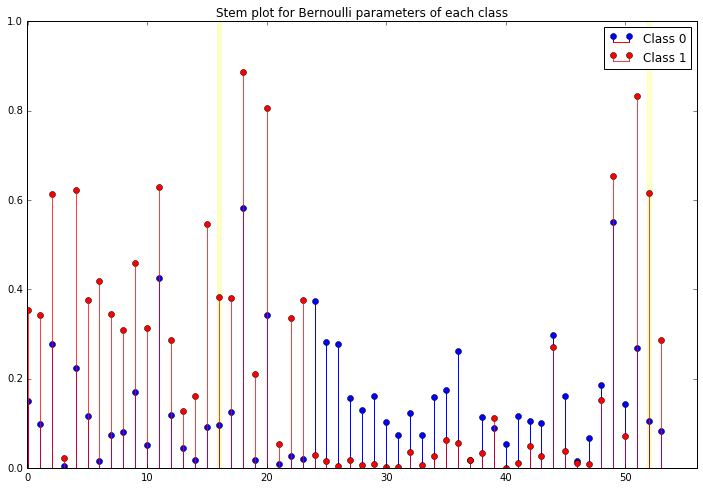

time: 665 ms


In [18]:
plt.figure(figsize=(12,8))

plt.stem(theta_X_0_Bern)
plt.setp(plt.stem(theta_X_1_Bern), linewidth = .75, color ='r')
plt.xlim(-.05,56)
plt.ylim(0,1)
plt.title('Stem plot for Bernoulli parameters of each class')
labels = ['Class 0', 'Class 1']
plt.legend(labels)

plt.axvspan(15.8, 16.2, color='yellow', alpha=0.2)
plt.axvspan(51.8, 52.2, color='yellow', alpha=0.2)


plt.show()

### make observation about dimension 16 and 52

Those two words are "free" and "!" from the document description. Based on parameters stem plot, we can claim that the probability of an email being marked as spam if it contains those two words, is much higher than being not-spam.

## C - KNN Algorithm

In [8]:
def knn_classifier(training_data, train_label, test_data, test_label, k):  
    dist = np.empty([training_data.shape[0], ])
    knn_prediction = pd.DataFrame()
 
    for i in range(test_data.shape[0]):
        dist = np.column_stack((dist, np.sum(np.abs(test_data[i, :] - training_data), axis=1)))

    for i in range(test_data.shape[0]):
        for k in range(1, k+1):
            knn_index = dist[:, i].argsort()[:k]
            training_lables = y_train[knn_index]

            knn_prediction.set_value(i, k, scipy.stats.mode(training_lables)[0][0])  
 
    # accuracy
    knn_arr = knn_prediction.values
    knn_accuracy = []

    for i in range(0, k):
        correct_predict = np.where(knn_arr[:, i] == test_label)[0].shape[0]
        knn_accuracy.append(correct_predict/93)

    return knn_prediction, knn_accuracy

time: 19.4 ms


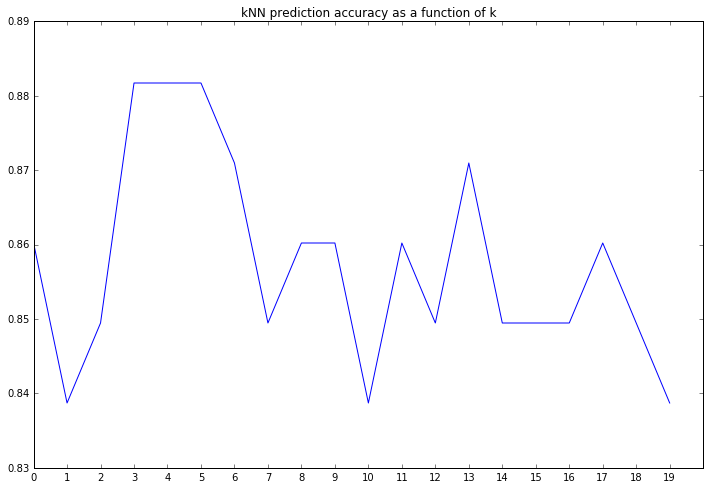

time: 2.4 s


In [9]:
# Calling knn_classifier function
knn_prediction, acc = knn_classifier(X_train, y_train, X_test, y_test, 20)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(acc)
plt.xlim([0, 20])
plt.xticks(np.arange(0, 20, 1))

# Chart title
plt.title('kNN prediction accuracy as a function of k')

# D- Logistic Regression - steepest ascent algorithm

In [10]:
# replacing all 0s with -1
y_train_reg, y_test_reg = y_train, y_test
y_train_reg = y_train_reg.reshape(-1,1)

y_train_reg[y_train_reg == 0] = -1
y_test_reg[y_test_reg == 0] = -1

# add an extra dimesnion to data
X_train_reg = np.concatenate((X_train, np.tile(1, (X_train.shape[0],1))), axis=1)
X_test_reg = np.concatenate((X_test, np.tile(1, (X_test.shape[0],1))), axis=1)

time: 8.8 ms


In [23]:
def sigmoid(scores):
    return expit(scores)

# Initializing the parameters
num_iteration = 10000
weights = np.zeros((1,X_train_reg.shape[1]))
obj_function = np.empty([0,0])

for steps in range(1,num_iteration + 1):   
    # setting the learning rate
    learning_rate = 1e-5/np.sqrt( 1 + steps)

      
    scores = np.dot(np.multiply(y_train_reg, X_train_reg), weights.T)

    s = sigmoid(scores)
    # Updated weights with gradient ascend
    output_error = np.multiply((1-s), y_train_reg)

    gradient = np.dot(X_train_reg.T, output_error)
    
    weights += learning_rate * gradient.T

    # Appending the objective value of iteratio
    obj_function = np.append(obj_function, np.sum(np.log(s))) 

/Users/Amiros/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log


time: 15.1 s


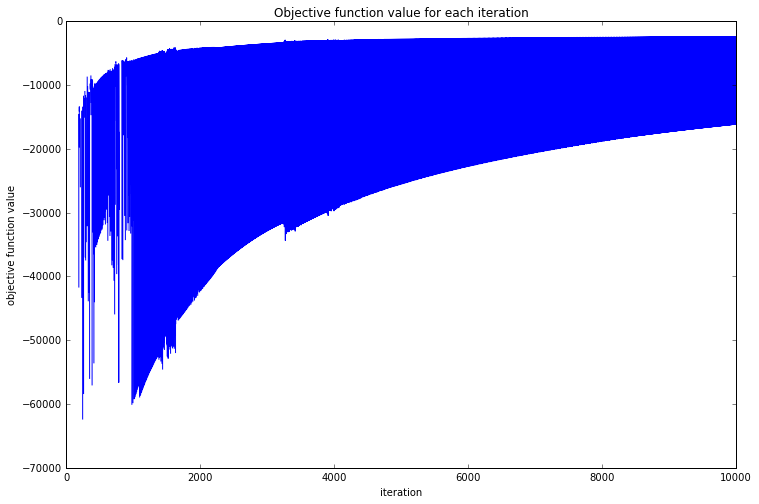

time: 1.09 s


In [24]:
plt.figure(figsize=(12,8))

x = range(0,10000)
plot(obj_function)

plt.xlim(0,10000)
plt.title('Objective function value for each iteration')
plt.xlabel('iteration')
plt.ylabel('objective function value')

## E- Newton Method

In [105]:
num_iteration = 100
weights = np.zeros((1,X_train_reg.shape[1]))
obj_function = np.empty([0,0])

for steps in range(1,num_iteration + 1):   
    # setting the learning rate
    learning_rate = 1/np.sqrt( 1 + steps)
    
    scores = np.dot(np.multiply(y_train_reg, X_train_reg), weights.T)
    
    # Gradient
    s = sigmoid(scores)
    output_error = np.multiply((1-s), y_train_reg)
    gradient = np.dot(X_train_reg.T, output_error)
    
    # Hessian
    s_h = s * (1-s)
    hessian = np.dot(X_train_reg.T, np.multiply(ss, X_train_reg))
    hessian_invers = np.linalg.inv(gg)
    
    # adding Gradient and Hessian
    t = np.dot(hessian_invers, gradient)
    
    weights += learning_rate * t.T

    # Appending the objective value of iteratio
    obj_function = np.append(obj_function, np.sum(np.log(s))) 

time: 431 ms


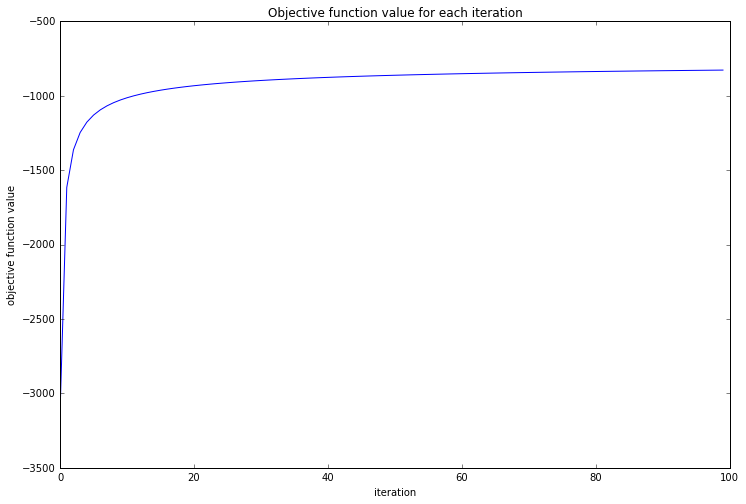

time: 436 ms


In [109]:
plt.figure(figsize=(12,8))

x = range(0,10000)
plot(obj_function)

plt.xlim(0,100)
plt.title('Objective function value for each iteration')
plt.xlabel('iteration')
plt.ylabel('objective function value')